# Tarea 4
## Exercise 3 Dataframe exploration
## Import csv file to dataframe using pandas

In [3]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

set path and import file

In [4]:
path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
terminos_df = import_csv(path)

## Explore dataframe

explore column names

In [5]:
print(terminos_df.columns)

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')


Head - explore first 7 rows

In [6]:
print(terminos_df.head(7))

   sample      date     estuary   area station layer_depth season  \
0  CDL01S  5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1  CDL01F  5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2  CDL02S  5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3  CDL02F  5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4  CDL03S  5/3/2020  Candelaria  River   CDL03     Surface    Dry   
5  CDL03F  5/3/2020  Candelaria  River   CDL03      Bottom    Dry   
6  CDL04S  5/3/2020  Candelaria  Plume   CDL04     Surface    Dry   

   chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                0.36                7015.4    0.464  ...     7.12     3.56   
1                4.19               29886.1    7.792  ...     4.90    16.97   
2                0.92               16691.1    0.453  ...     6.99     8.94   
3                2.23               24847.4    1.261  ...     6.52    13.87   
4                0.58               46341.6    0.465

Shape - Dataframe dimmensions (rows, columns)

In [7]:
print(terminos_df.shape)

(106, 21)


Info - Explore dataframe information

In [8]:
print(terminos_df.info)

<bound method DataFrame.info of      sample       date     estuary   area station layer_depth season  \
0    CDL01S   5/3/2020  Candelaria  River   CDL01     Surface    Dry   
1    CDL01F   5/3/2020  Candelaria  River   CDL01      Bottom    Dry   
2    CDL02S   5/3/2020  Candelaria  River   CDL02     Surface    Dry   
3    CDL02F   5/3/2020  Candelaria  River   CDL02      Bottom    Dry   
4    CDL03S   5/3/2020  Candelaria  River   CDL03     Surface    Dry   
..      ...        ...         ...    ...     ...         ...    ...   
101  PLZ07F  10/2/2021    Palizada  Coast   PLZ07      Bottom    Dry   
102  PLZ08S  10/2/2021    Palizada  Coast   PLZ08     Surface    Dry   
103  PLZ08F  10/2/2021    Palizada  Coast   PLZ08      Bottom    Dry   
104  PLZ09S  10/2/2021    Palizada  Coast   PLZ09     Surface    Dry   
105  PLZ09F  10/2/2021    Palizada  Coast   PLZ09      Bottom    Dry   

     chlorophy_microg_l  cond_microsiemens_cm  depth_m  ...  do_mg_l  sal_psu  \
0                  0.3

Describe - basic statistics of dataframe

In [9]:
print(terminos_df.describe())

       chlorophy_microg_l  cond_microsiemens_cm     depth_m  do_percent_sat  \
count          106.000000            106.000000  106.000000      106.000000   
mean             6.545472          27895.183962    1.830160       89.515094   
std             14.941262          20931.232513    2.038739       29.772291   
min              0.360000             13.800000    0.105000        1.700000   
25%              2.555000           1778.025000    0.428750       84.575000   
50%              3.705000          33202.600000    0.638500       97.100000   
75%              5.925000          47046.650000    2.883250      105.300000   
max            150.900000          59988.600000    8.558000      174.100000   

          do_mg_l     sal_psu  sp_cond_microsiemens_cm  turbidity_fnu  \
count  106.000000  106.000000               106.000000     106.000000   
mean     6.474340   17.331981             27126.980189     100.429623   
std      2.104254   13.578980             20527.530804     290.290113

Extract variables individually as objects

In [10]:
ta = terminos_df['ta_micromol_kg']
#total alcalinity

In [11]:
dic = terminos_df['dic_micromol_kg']
#dissolved inorganic carbon

plot of single variable

<Axes: >

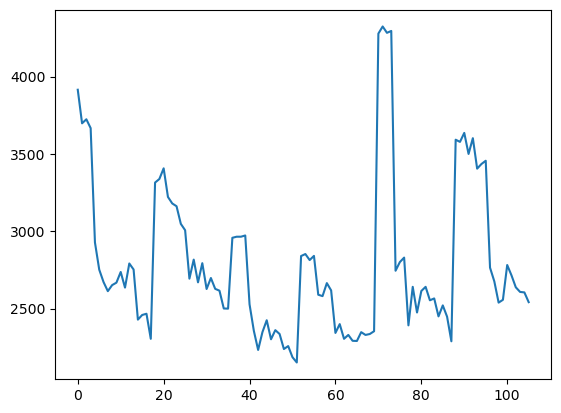

In [12]:
dic.plot()

In [13]:
dic.mean()

np.float64(2797.9811320754716)

Extract two variables as object

In [14]:
dic_ta_data = terminos_df[['dic_micromol_kg', 'ta_micromol_kg']]

Plot two variables object

<Axes: >

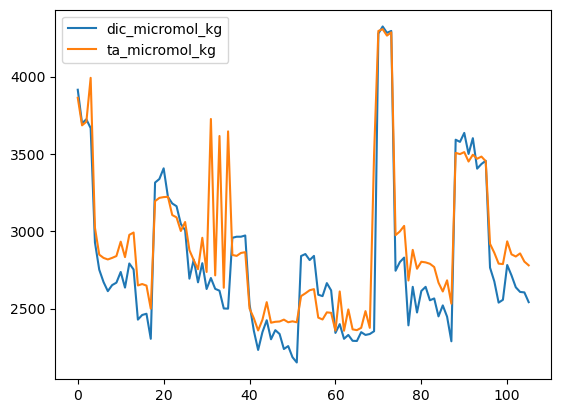

In [15]:
dic_ta_data.plot()

extract data as subset (depending of certain variable level)

In [16]:
terminos_rainy = terminos_df[terminos_df['season'] == 'Rainy']

extract data as restrictive subset

In [17]:
terminos_non_candelaria = terminos_df[terminos_df['estuary'] != 'Candelaria']

extract data based on variable range

In [18]:
terminos_surf_g = terminos_df[terminos_df['depth_m'] <= 0.5]
#not greater than 0.5 m
terminos_surf_l = terminos_df[terminos_df['depth_m'] >= 0.5]
#not lesser than 0.5 m

Group data by categorical column and estimate mean and standar deviation of numercial variable

In [ ]:
# set variables columns
variables = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu']

# set results
result = terminos_df.groupby(['season', 'estuary'])[variables].agg(['mean', 'std']).reset_index()

In [23]:
# show results
print(result.head())

  season     estuary dic_micromol_kg             ta_micromol_kg              \
                                mean         std           mean         std   
0    Dry  Candelaria     2917.055556  630.585893    3076.777778  556.680114   
1    Dry    Palizada     2968.194444  391.242257    3107.888889  323.177154   
2  Rainy  Candelaria     2474.125000  306.407980    2537.062500  192.848635   
3  Rainy    Palizada     2507.277778  216.751092    2529.333333  260.962923   

     sal_psu             
        mean        std  
0  23.633889  12.121592  
1  16.392500  13.830189  
2  15.165000  13.937384  
3   8.533333   9.940109  


Build mean +- sd table

In [25]:
#set libraries
import pandas as pd
from tabulate import tabulate

In [26]:
#set column names
result.columns = ['season', 'estuary'] + [f"{var}_{stat}" for var in variables for stat in ['mean', 'std']]

#reset values to show mean +- sd 
for var in variables:
    mean_col = f"{var}_mean"
    std_col = f"{var}_std"
    result[f"{var}_formatted"] = result.apply(lambda row: f"{row[mean_col]:.2f} ± {row[std_col]:.2f}", axis=1)

In [33]:
#select formatted columns and index
formatted_result = result[['season', 'estuary'] + [f"{var}_formatted" for var in variables]]

# show table with results
table = tabulate(formatted_result, headers='keys', tablefmt='pipe', showindex=False)
print(table)

| season   | estuary    | dic_micromol_kg_formatted   | ta_micromol_kg_formatted   | sal_psu_formatted   |
|:---------|:-----------|:----------------------------|:---------------------------|:--------------------|
| Dry      | Candelaria | 2917.06 ± 630.59            | 3076.78 ± 556.68           | 23.63 ± 12.12       |
| Dry      | Palizada   | 2968.19 ± 391.24            | 3107.89 ± 323.18           | 16.39 ± 13.83       |
| Rainy    | Candelaria | 2474.12 ± 306.41            | 2537.06 ± 192.85           | 15.16 ± 13.94       |
| Rainy    | Palizada   | 2507.28 ± 216.75            | 2529.33 ± 260.96           | 8.53 ± 9.94         |


## Exercise 4 Missing values

Identify missing values

In [29]:
print(terminos_df.isnull().sum())

sample                     0
date                       0
estuary                    0
area                       0
station                    0
layer_depth                0
season                     0
chlorophy_microg_l         0
cond_microsiemens_cm       0
depth_m                    0
do_percent_sat             0
do_mg_l                    0
sal_psu                    0
sp_cond_microsiemens_cm    0
turbidity_fnu              0
temp_c                     0
latitude                   0
longitude                  0
dic_micromol_kg            0
ta_micromol_kg             0
dummy_data                 7
dtype: int64


Fill missing values 

In [31]:
# create alternative dataframe 
terminos_fill = terminos_df.copy()

#fill missing values 
terminos_fill = terminos_fill.fillna(method='ffill')

sample                     0
date                       0
estuary                    0
area                       0
station                    0
layer_depth                0
season                     0
chlorophy_microg_l         0
cond_microsiemens_cm       0
depth_m                    0
do_percent_sat             0
do_mg_l                    0
sal_psu                    0
sp_cond_microsiemens_cm    0
turbidity_fnu              0
temp_c                     0
latitude                   0
longitude                  0
dic_micromol_kg            0
ta_micromol_kg             0
dummy_data                 0
dtype: int64


C:\Users\Luis Aviles\AppData\Local\Temp\ipykernel_14536\1958876420.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  terminos_fill = terminos_fill.fillna(method='ffill')


In [32]:
#Veriffy the fill 
print(terminos_fill.isnull().sum())

sample                     0
date                       0
estuary                    0
area                       0
station                    0
layer_depth                0
season                     0
chlorophy_microg_l         0
cond_microsiemens_cm       0
depth_m                    0
do_percent_sat             0
do_mg_l                    0
sal_psu                    0
sp_cond_microsiemens_cm    0
turbidity_fnu              0
temp_c                     0
latitude                   0
longitude                  0
dic_micromol_kg            0
ta_micromol_kg             0
dummy_data                 0
dtype: int64


## EXCERCISE 
    - Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC
    - Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season
    - Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area
    - Save the results to an Excel file called "TA_DIC_Season_Areas.xlsx"

new column ratio ta / dic

In [34]:
terminos_fill["ta_dic_ratio"] = terminos_fill["ta_micromol_kg"] / terminos_fill["dic_micromol_kg"]

Calculate mean and sd ta_dic_ratio for each season

In [35]:
# set variables columns
variables1 = ['ta_dic_ratio']

# set results
result1 = terminos_fill.groupby(['season'])[variables1].agg(['mean', 'std']).reset_index()

In [36]:
#set column names
result1.columns = ['season'] + [f"{var}_{stat}" for var in variables1 for stat in ['mean', 'std']]

#reset values to show mean +- sd 
for var in variables1:
    mean_col = f"{var}_mean"
    std_col = f"{var}_std"
    result1[f"{var}_formatted"] = result1.apply(lambda row: f"{row[mean_col]:.2f} ± {row[std_col]:.2f}", axis=1)

In [38]:
#select formatted columns and index
formatted_result1 = result1[['season'] + [f"{var}_formatted" for var in variables1]]

# show table with results
table1 = tabulate(formatted_result1, headers='keys', tablefmt='pipe', showindex=False)
print(table1)

| season   | ta_dic_ratio_formatted   |
|:---------|:-------------------------|
| Dry      | 1.06 ± 0.09              |
| Rainy    | 1.02 ± 0.10              |


Calculate mean and sd ta_dic_ratio for each season and area

In [39]:
# set variables columns
variables1 = ['ta_dic_ratio']

# set results
result2 = terminos_fill.groupby(['season', 'area'])[variables1].agg(['mean', 'std']).reset_index()

In [40]:
#set column names
result2.columns = ['season', 'area'] + [f"{var}_{stat}" for var in variables1 for stat in ['mean', 'std']]

#reset values to show mean +- sd 
for var in variables1:
    mean_col = f"{var}_mean"
    std_col = f"{var}_std"
    result2[f"{var}_formatted"] = result2.apply(lambda row: f"{row[mean_col]:.2f} ± {row[std_col]:.2f}", axis=1)

In [41]:
#select formatted columns and index
formatted_result2 = result2[['season', 'area'] + [f"{var}_formatted" for var in variables1]]

# show table with results
table2 = tabulate(formatted_result2, headers='keys', tablefmt='pipe', showindex=False)
print(table2)

| season   | area   | ta_dic_ratio_formatted   |
|:---------|:-------|:-------------------------|
| Dry      | Coast  | 1.12 ± 0.12              |
| Dry      | Plume  | 1.06 ± 0.04              |
| Dry      | River  | 1.00 ± 0.04              |
| Rainy    | Coast  | 1.09 ± 0.13              |
| Rainy    | Plume  | 1.03 ± 0.05              |
| Rainy    | River  | 0.95 ± 0.03              |


Transform to dataframe and save as xlsx file

In [46]:
#verify if dataframe
print(type(result2))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from tabulate import tabulate
import pandas as pd

# save as xlsx
result2.to_excel("terminos_TA_DIC_stats.xlsx")